# FINAL PROJECT
# INTRODUCING PYTHON FOR DATA SCIENCE

## EPL Results 1993-2018

### Pengantar

Kumpulan data ini berisi hasil dari setiap pertandingan Liga Premier dari 1993-1994 hingga 2017-2018.

Sumber data berasal dari Kaggle.

### Import Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

Dataset ini memiliki kolom:
Kolom termasuk Divisi (dilambangkan sebagai E0), 
<!-- Tim Tuan Rumah, 
Tim Tamu, 
FTHG (gol kandang terakhir kali), 
FTAG (gol tandang waktu terakhir), 
FTR (hasil waktu penuh), 
HTHG (gol kandang paruh waktu), 
HTAG (gol tandang paruh waktu) ), 
HTR (hasil paruh waktu), dan musim. -->
- `Div` : Divisi, dilambangkan sebagai E0
- `HomeTeam` : Tim tuan rumah
- `AwayTeam` : Tim tamu
- `FTHG` : Gol kandang akhir waktu
- `FTAG` : Gol tandang akhir waktu
- `FTR` : Hasil pertandingan hingga selesai
- `HTHG` : Gol kandang paruh waktu
- `HTAG` : Gol tandang paruh waktu
- `HTR` : Hasil paruh waktu
- `season` : Musim

In [2]:
dataset = pd.read_csv('dataset/EPL_Set.csv')
dataset

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94
...,...,...,...,...,...,...,...,...,...,...,...
9659,E0,13/05/18,Newcastle,Chelsea,3,0,H,1.0,0.0,H,2017-18
9660,E0,13/05/18,Southampton,Man City,0,1,A,0.0,0.0,D,2017-18
9661,E0,13/05/18,Swansea,Stoke,1,2,A,1.0,2.0,A,2017-18
9662,E0,13/05/18,Tottenham,Leicester,5,4,H,1.0,2.0,A,2017-18


In [3]:
dataset.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94
5,E0,14/08/93,Newcastle,Tottenham,0,1,A,NaN,NaN,NaN,1993-94
6,E0,14/08/93,Oldham,Ipswich,0,3,A,NaN,NaN,NaN,1993-94
7,E0,14/08/93,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,1993-94
8,E0,14/08/93,Southampton,Everton,0,2,A,NaN,NaN,NaN,1993-94
9,E0,14/08/93,West Ham,Wimbledon,0,2,A,NaN,NaN,NaN,1993-94


In [4]:
dataset.tail(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
9654,E0,13/05/18,Burnley,Bournemouth,1,2,A,1.0,0.0,H,2017-18
9655,E0,13/05/18,Crystal Palace,West Brom,2,0,H,0.0,0.0,D,2017-18
9656,E0,13/05/18,Huddersfield,Arsenal,0,1,A,0.0,1.0,A,2017-18
9657,E0,13/05/18,Liverpool,Brighton,4,0,H,2.0,0.0,H,2017-18
9658,E0,13/05/18,Man United,Watford,1,0,H,1.0,0.0,H,2017-18
9659,E0,13/05/18,Newcastle,Chelsea,3,0,H,1.0,0.0,H,2017-18
9660,E0,13/05/18,Southampton,Man City,0,1,A,0.0,0.0,D,2017-18
9661,E0,13/05/18,Swansea,Stoke,1,2,A,1.0,2.0,A,2017-18
9662,E0,13/05/18,Tottenham,Leicester,5,4,H,1.0,2.0,A,2017-18
9663,E0,13/05/18,West Ham,Everton,3,1,H,1.0,0.0,H,2017-18


In [5]:
dataset.shape

(9664, 11)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


In [7]:
dataset.isnull().sum()

Div           0
Date          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG        924
HTAG        924
HTR         924
Season        0
dtype: int64

In [53]:
# dataset = dataset.drop(columns=['HTHG','HTAG','HTR'])
dataset = dataset[924:-1]
dataset = dataset.astype({"HTHG": int, "HTAG": int})

In [54]:
dataset.isnull().sum()

Div            0
Date           0
HomeTeam       0
AwayTeam       0
FTHG           0
FTAG           0
FTR            0
HTHG           0
HTAG           0
HTR            0
Season         0
Winner         0
Total Goals    0
dtype: int64

### Exploratory Data

In [55]:
# Jumlah pertandingan kandang yang dimainkan masing-masing tim dari 1993 hingga Mei 2018
dataset["HomeTeam"].value_counts(dropna=False)

Chelsea             392
Man United          391
Liverpool           391
Arsenal             391
Everton             391
Tottenham           390
Newcastle           353
Aston Villa         353
West Ham            334
Man City            323
Sunderland          285
Southampton         257
Fulham              247
Blackburn           238
West Brom           228
Bolton              220
Middlesbrough       209
Stoke               190
Leicester           180
Wigan               152
Charlton            152
Birmingham          133
Swansea             133
Portsmouth          133
Crystal Palace      126
Leeds               124
Derby               106
Watford              95
Hull                 95
Norwich              95
Wolves               76
Burnley              76
Coventry             67
Bournemouth          57
QPR                  57
Reading              57
Sheffield Weds       49
Wimbledon            48
Bradford             38
Ipswich              38
Cardiff              19
Sheffield United

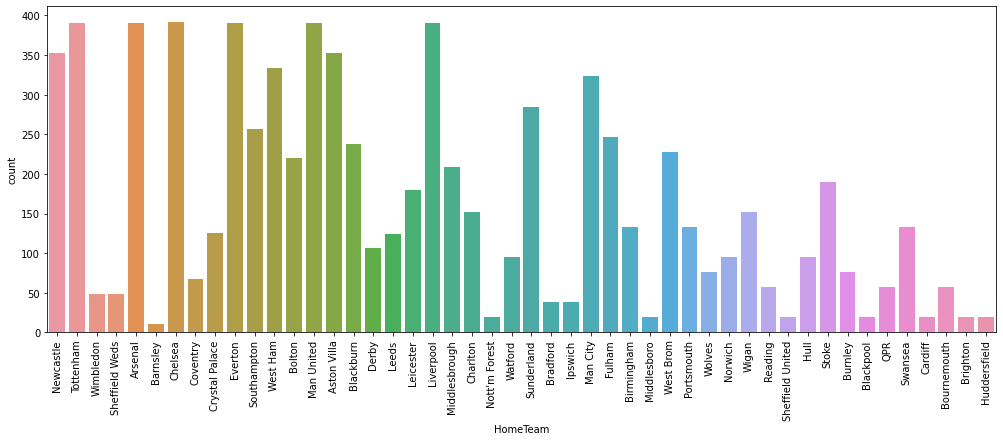

In [56]:
plt.figure(figsize=(17, 6))
sns.countplot(x='HomeTeam', data=dataset)
plt.xticks(rotation='vertical')
plt.show()

In [44]:
# Jumlah pertandingan tandang yang dimainkan masing-masing tim dari 1993 hingga Mei 2018
dataset["AwayTeam"].value_counts(dropna=False)

Man United          479
Tottenham           479
Liverpool           479
Chelsea             479
Arsenal             479
Everton             479
Newcastle           441
Aston Villa         441
West Ham            422
Man City            384
Southampton         346
Blackburn           327
Sunderland          304
Fulham              247
Middlesbrough       247
Bolton              247
Leicester           230
West Brom           228
Leeds               213
Stoke               190
Coventry            156
Crystal Palace      154
Wigan               152
Charlton            152
Wimbledon           137
Norwich             137
Sheffield Weds      137
Birmingham          133
Derby               133
Swansea             133
Portsmouth          133
QPR                 118
Hull                 95
Watford              95
Ipswich              80
Nott'm Forest        78
Wolves               76
Burnley              76
Bournemouth          57
Reading              57
Sheffield United     40
Bradford        

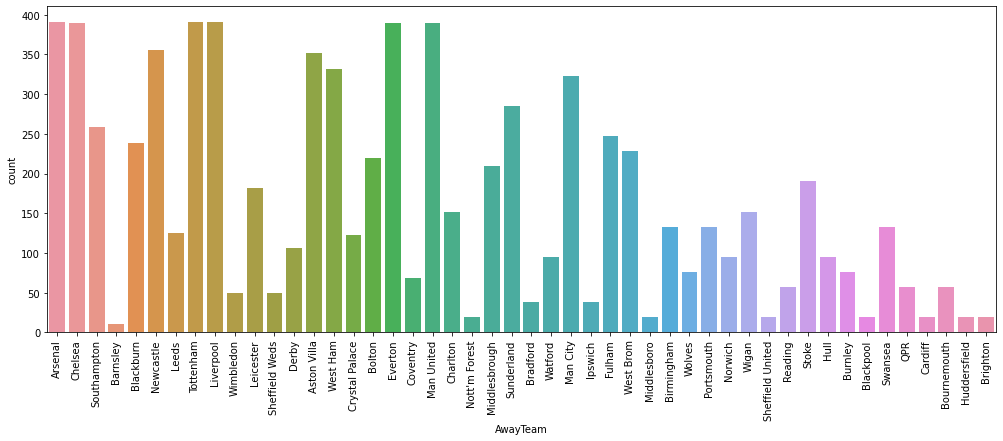

In [57]:
plt.figure(figsize=(17, 6))
sns.countplot(x='AwayTeam', data=dataset)
plt.xticks(rotation='vertical')
plt.show()

In [58]:
# Jumlah pertandingan yang dimenangkan tim di setiap musim

## Definisikan dahulu menggunakan kolom baru bernama 'Winner' 
## untuk setiap pertandingan
conditions = [dataset['FTR']=='A',dataset['FTR']=='H',dataset['FTR']=='D']
conditions
select = [dataset['AwayTeam'],dataset['HomeTeam'],'Draw']
dataset['Winner']=np.select(conditions, select)

In [14]:
## Menampilkan jumlah pertandingan masing-masing 
## tim yang dimenangkan di seluruh musim yang dilalui
swin = dataset.loc[:,['Season','Winner']]
gswin = swin.groupby(['Season', 'Winner']).size().reset_index(name='counts')
gsort = gswin.sort_values(['Season', 'counts'], ascending=[True, False])
gsort

,Season,Winner,counts
6,1995-96,Draw,98
11,1995-96,Man United,25
13,1995-96,Newcastle,24
9,1995-96,Liverpool,20
1,1995-96,Aston Villa,18
...,...,...,...
482,2017-18,West Ham,9
478,2017-18,Swansea,8
476,2017-18,Southampton,7
477,2017-18,Stoke,7


<AxesSubplot:xlabel='Winner', ylabel='count'>

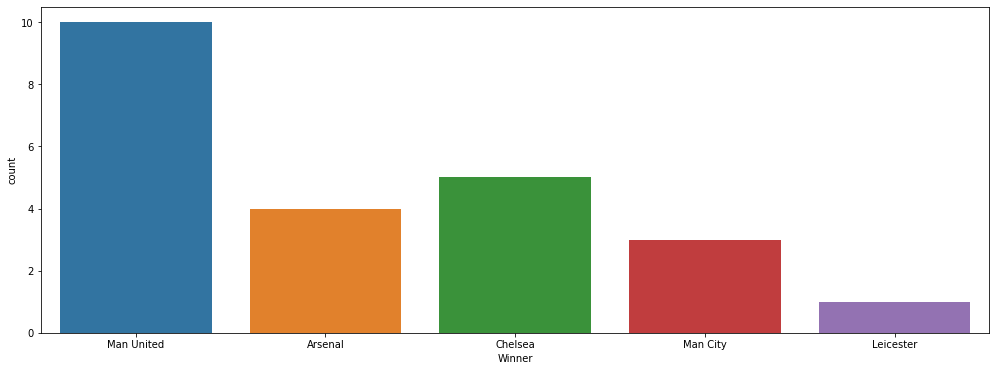

In [59]:
rem_draws = gsort[gsort.Winner.str.contains('Draw')==False].reset_index()
rem_draws

most_wins= rem_draws.groupby('Season').head(1)
most_wins
plt.figure(figsize=(17, 6))
sns.countplot(x='Winner', data=most_wins)

Dari plot di atas, terlihat jelas bahwa Manchester United adalah tim dengan jumlah kemenangan terbanyak setiap musim.

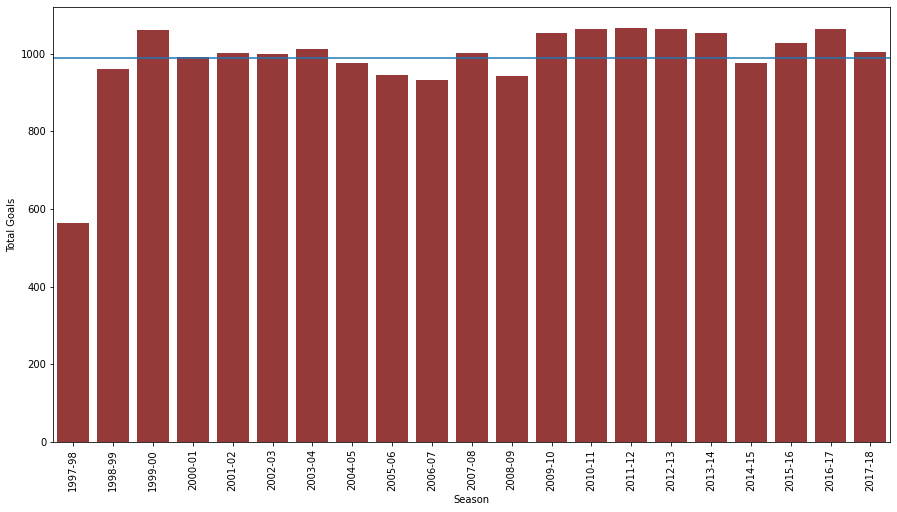

In [60]:
# Melihat jumlah gol di setiap seasonnya
dataset['Total Goals']= dataset['FTHG'] + dataset['FTAG']
loca = dataset.loc[:,['Season','Total Goals']]
summ =loca.groupby('Season').sum().reset_index()
tot = summ['Total Goals']
plt.figure(figsize=(15,8))
grid=sns.barplot(x='Season',y='Total Goals',data=summ,color='brown')
grid.set_xticklabels(summ['Season'],rotation=90)
plt.axhline(tot.mean())
plt.show()

data plot di atas, awal 2010-2014 lebih tinggi dari nilai rata-rata.

In [61]:
# Berapa persentase keuntungan sebagai tim kandang 
# untuk mencetak gol?
epl_results_nodraw = dataset[dataset.Winner.str.contains('Draw')==False]
procentage_goal = len(dataset[dataset['FTR']=='H']) / len(epl_results_nodraw) * 100
print("Prosentase tim kandang mencetak gol:", '{:6.2f}'.format(procentage_goal))

Prosentase tim kandang mencetak gol:  62.67


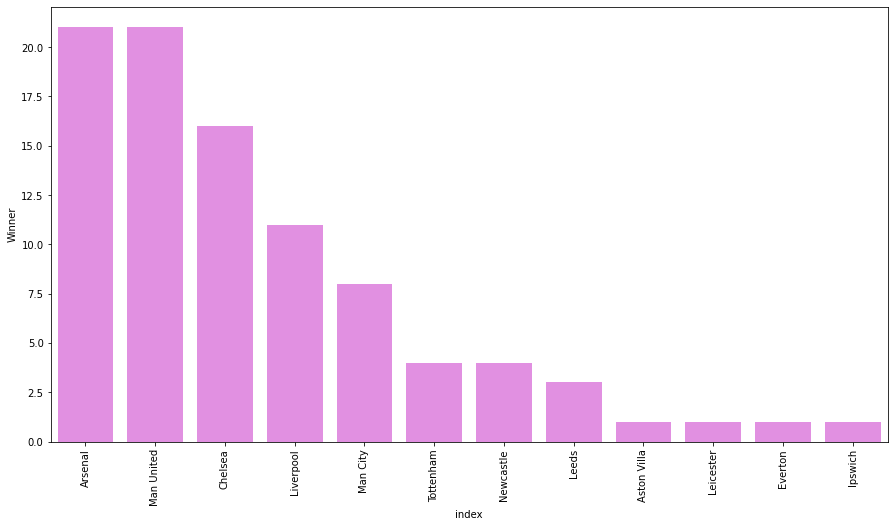

In [62]:
# 4 tim teratas di setiap musimnya
rem_draws1 = gsort[gsort.Winner.str.contains('Draw')==False].reset_index()
rem_draws1

top4 = rem_draws1.groupby('Season').head(4)
valc = top4['Winner'].value_counts().reset_index()
plt.figure(figsize=(15,8))
grid1=sns.barplot(x='index',y='Winner',data= valc, color='violet')
grid1.set_xticklabels(valc['index'],rotation=90)
plt.show()

Berdasarkan plot di atas, Manchester United tetap memimpin dengan masuk 4 tim teratas dengan jumlah leih dari 20 kali

### Model Definition

In [63]:
dataset

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Winner,Total Goals
1848,E0,6/12/1997,Newcastle,Arsenal,0,1,A,0,1,A,1997-98,Arsenal,1
1849,E0,6/12/1997,Tottenham,Chelsea,1,6,A,1,1,D,1997-98,Chelsea,7
1850,E0,7/12/1997,Wimbledon,Southampton,1,0,H,1,0,H,1997-98,Wimbledon,1
1851,E0,8/12/1997,Sheffield Weds,Barnsley,2,1,H,1,1,D,1997-98,Sheffield Weds,3
1852,E0,13/12/97,Arsenal,Blackburn,1,3,A,1,0,H,1997-98,Blackburn,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9657,E0,13/05/18,Liverpool,Brighton,4,0,H,2,0,H,2017-18,Liverpool,4
9658,E0,13/05/18,Man United,Watford,1,0,H,1,0,H,2017-18,Man United,1
9659,E0,13/05/18,Newcastle,Chelsea,3,0,H,1,0,H,2017-18,Newcastle,3
9660,E0,13/05/18,Southampton,Man City,0,1,A,0,0,D,2017-18,Man City,1


In [114]:
X = dataset.iloc[:,5:6].values
y = dataset.iloc[:,7:8].values
print(X[0])
print(y[0])

[1]
[0]


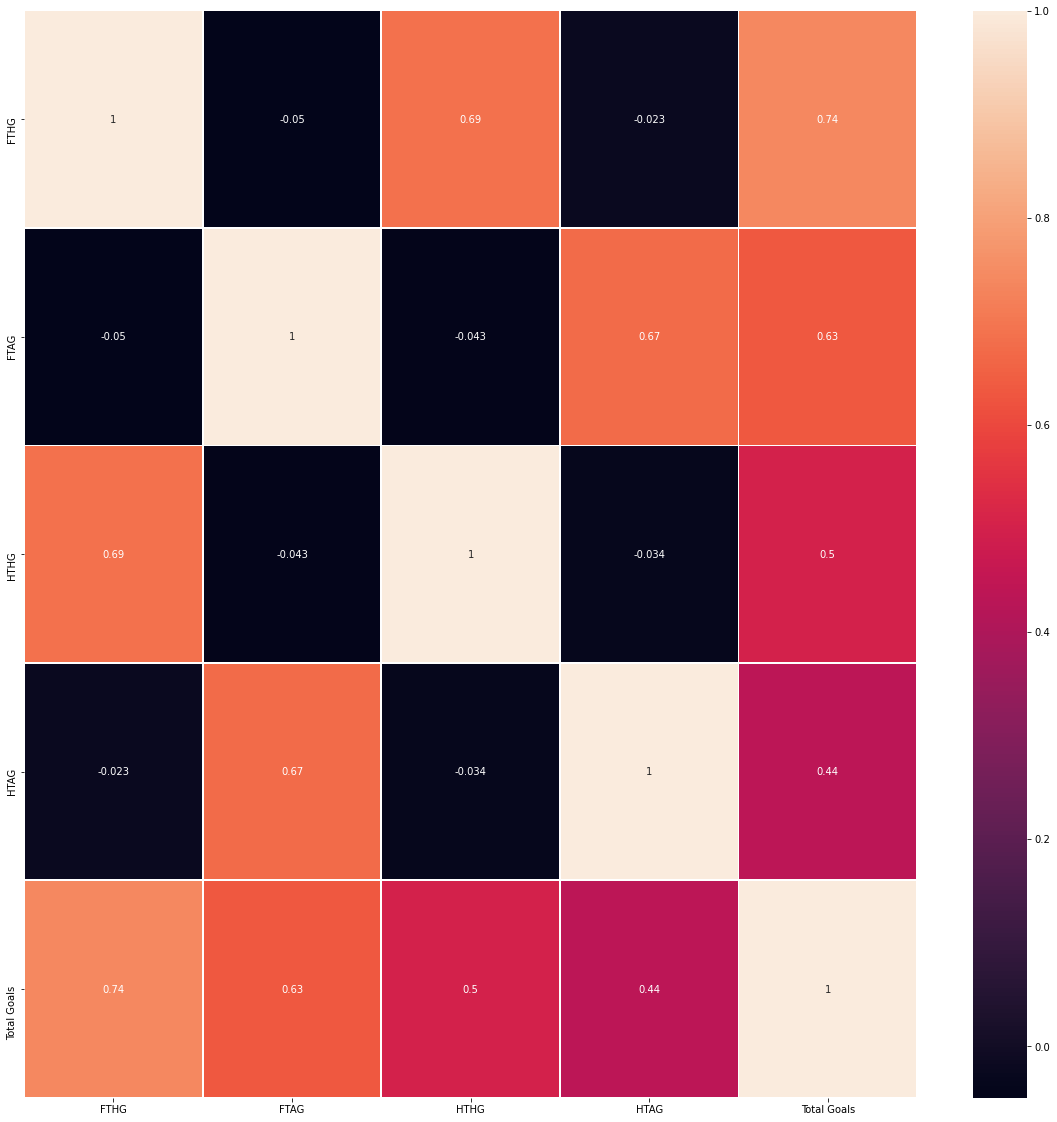

In [115]:
corr_matrix = dataset.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))

g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,linewidths=.75)
plt.show()

In [136]:
# Training Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2,
    random_state=11
)
print("training size:", X_train.shape[0])
print("test size:", X_test.shape[0])

training size: 6251
test size: 1563


In [137]:
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_acc = model.score(X_train, y_train)
    
    test_pred = model.predict(X_test)
    test_acc = model.score(X_test, y_test)
    
    print("Training Performance")
    print("target: ", y_train)
    print("prediction: ", train_pred)
    print("accuracy score: ", train_acc)
    print("")
    print("Test Performance")
    print("target : ", y_test)
    print("prediction : ", test_pred)
    print("accuracy score : ", test_acc)
    
    print(classification_report(y_test, test_pred))

In [138]:
# LOGISITC REGRESSION
logistic = LogisticRegression()
train_model(logistic, X_train, X_test, y_train, y_test)

/home/freedom/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Performance
target:  [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]
prediction:  [0 0 0 ... 0 0 0]
accuracy score:  0.5069588865781475

Test Performance
target :  [[0]
 [0]
 [0]
 ...
 [2]
 [0]
 [0]]
prediction :  [0 0 0 ... 0 0 0]
accuracy score :  0.5099168266154831
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       797
           1       0.00      0.00      0.00       536
           2       0.00      0.00      0.00       181
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         1

    accuracy                           0.51      1563
   macro avg       0.08      0.17      0.11      1563
weighted avg       0.26      0.51      0.34      1563



/home/freedom/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
# DESCISION TREE CLASSIFIER
dst = DecisionTreeClassifier()
train_model(dst, X_train, X_test, y_train, y_test)

Training Performance
target:  [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]
prediction:  [0 0 0 ... 0 0 0]
accuracy score:  0.5071188609822428

Test Performance
target :  [[0]
 [0]
 [0]
 ...
 [2]
 [0]
 [0]]
prediction :  [0 0 0 ... 0 0 0]
accuracy score :  0.5099168266154831
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       797
           1       0.00      0.00      0.00       536
           2       0.00      0.00      0.00       181
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         1

    accuracy                           0.51      1563
   macro avg       0.08      0.17      0.11      1563
weighted avg       0.26      0.51      0.34      1563



/home/freedom/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
# RANDOM FOREST
rf = RandomForestClassifier()
train_model(rf, X_train, X_test, y_train, y_test)

<ipython-input-117-404bc502c9a6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Training Performance
target:  [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]
prediction:  [0 0 0 ... 0 0 0]
accuracy score:  0.5071188609822428

Test Performance
target :  [[0]
 [0]
 [0]
 ...
 [2]
 [0]
 [0]]
prediction :  [0 0 0 ... 0 0 0]
accuracy score :  0.5099168266154831
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       797
           1       0.00      0.00      0.00       536
           2       0.00      0.00      0.00       181
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         1

    accuracy                           0.51      1563
   macro avg       0.08      0.17      0.11      1563
weighted avg       0.26      0.51      0.34      1563



/home/freedom/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
# NAIVE BAYES
nb = GaussianNB()
train_model(nb, X_train, X_test, y_train, y_test)

Training Performance
target:  [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]
prediction:  [0 0 0 ... 0 5 0]
accuracy score:  0.33642617181251

Test Performance
target :  [[0]
 [0]
 [0]
 ...
 [2]
 [0]
 [0]]
prediction :  [5 0 0 ... 0 0 0]
accuracy score :  0.34101087651951373
              precision    recall  f1-score   support

           0       0.52      0.67      0.58       797
           1       0.00      0.00      0.00       536
           2       0.00      0.00      0.00       181
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00        10
           5       0.00      1.00      0.00         1

    accuracy                           0.34      1563
   macro avg       0.09      0.28      0.10      1563
weighted avg       0.26      0.34      0.30      1563



/home/freedom/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/freedom/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Conclusion 

Dari berdasarkan analisa model yang didapatkan, diperoleh data model sebagai berikut:
- Logistic Regression sebesar 0.5099168266154831
- Decission Tree Classifier sebesar 0.5099168266154831
- Ranom Forest sebesar 0.5099168266154831
- Naive Bayes sebesar 0.34101087651951373